#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


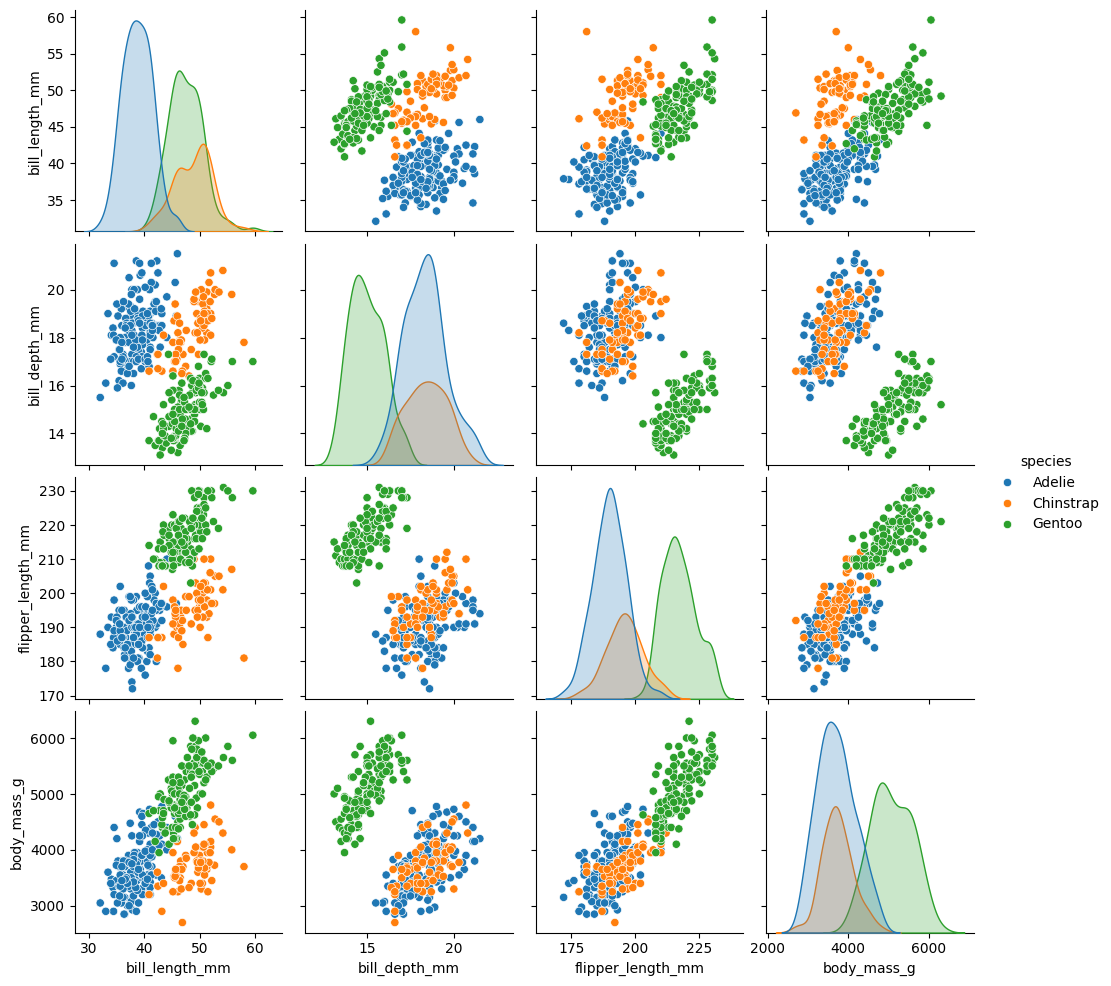

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

Описание столбцов набора данных penguins

Penguins - пингвины

species	- вид пингвина

island - остров, на котором обитает пингвин

bill_length_mm - длина клюва в миллиметрах

bill_depth_mm	- глубина клюва в миллиметрах

flipper_length_mm	- длина плавников в миллиметрах

body_mass_g	- масса тела в граммах

sex - пол

In [2]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Типы данных предложенных числовых атрибутов совпадают, можно исопользовать их при кластеризации.

In [3]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Нулевые значения в предложенном наборе данных отсутствуют.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

import warnings
warnings.filterwarnings("ignore")

Перед тем, как применять метод KMeans, необходимо исследовать, какое количество кластеров надо рассмотреть. Для этого ниже используются силуэтный анализ и метод локтя.

Оптимальное количество кластеров для KMeans: 2


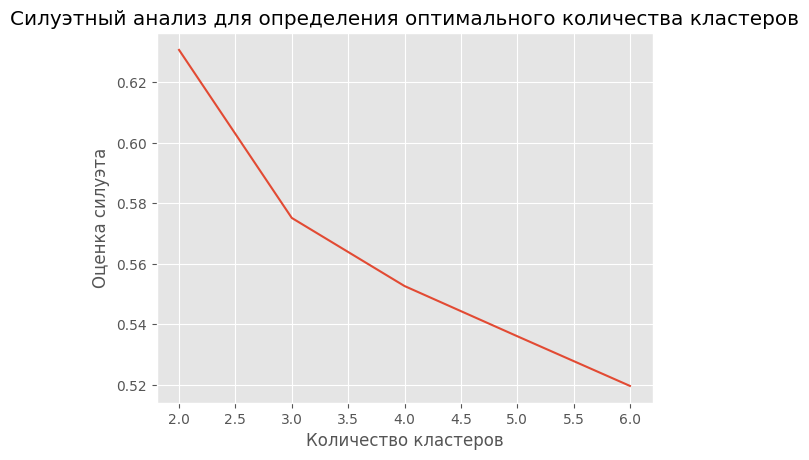

In [5]:
#силуэтный анализ

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

pengs = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[pengs]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

#определение оптимального числа кластеров
optimal_clusters = silhouette_avg.index(max(silhouette_avg)) + 2  # необходимо прибавить 2, так как индексация начинается с 0

print(f'Оптимальное количество кластеров для KMeans: {optimal_clusters}')

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Силуэтный анализ для определения оптимального количества кластеров')
plt.show()

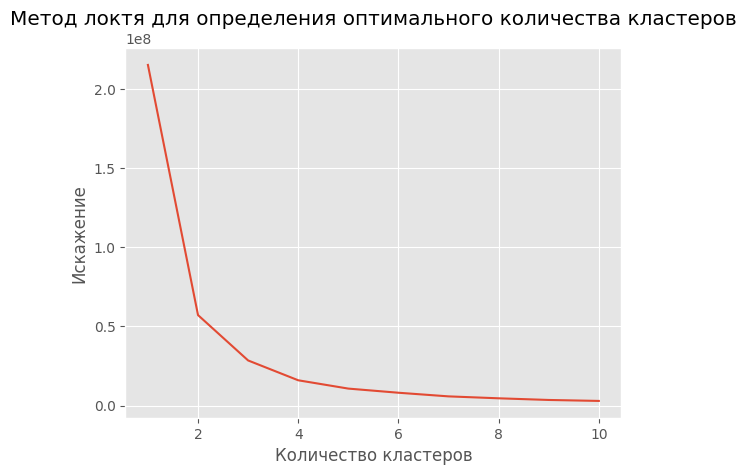

In [6]:
dist = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
    dist.append(kmeanModel.inertia_)

plt.plot(K, dist)
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.show()

- Более высокие значения индекса силуэта указывают на лучшее разделение. На графике индекса силуэта можно увидеть наивысшее значение при k=2, что указывает на оптимальное количество кластеров для набора данных.

- Метод локтя включает в себя выполнение KMeans с разным количеством кластеров и выбор значения k, при котором значение ошибки (например, сумма квадратов ошибок) резко уменьшается. На графике метода локтя можно увидеть значительное уменьшение значения ошибки при k=2.

1. Примените K-Means к набору данных пингвины.

In [7]:
#отбираем нужные числовые атрибуты
pengs = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[pengs]

#применяем метод KMeans с количеством кластеров равным 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?

Ответ на вопрос. Визуально они похожи на основную картину, однако благодаря кластеризации разные цвета практически не накладываются так, как было в изначальных графиках.

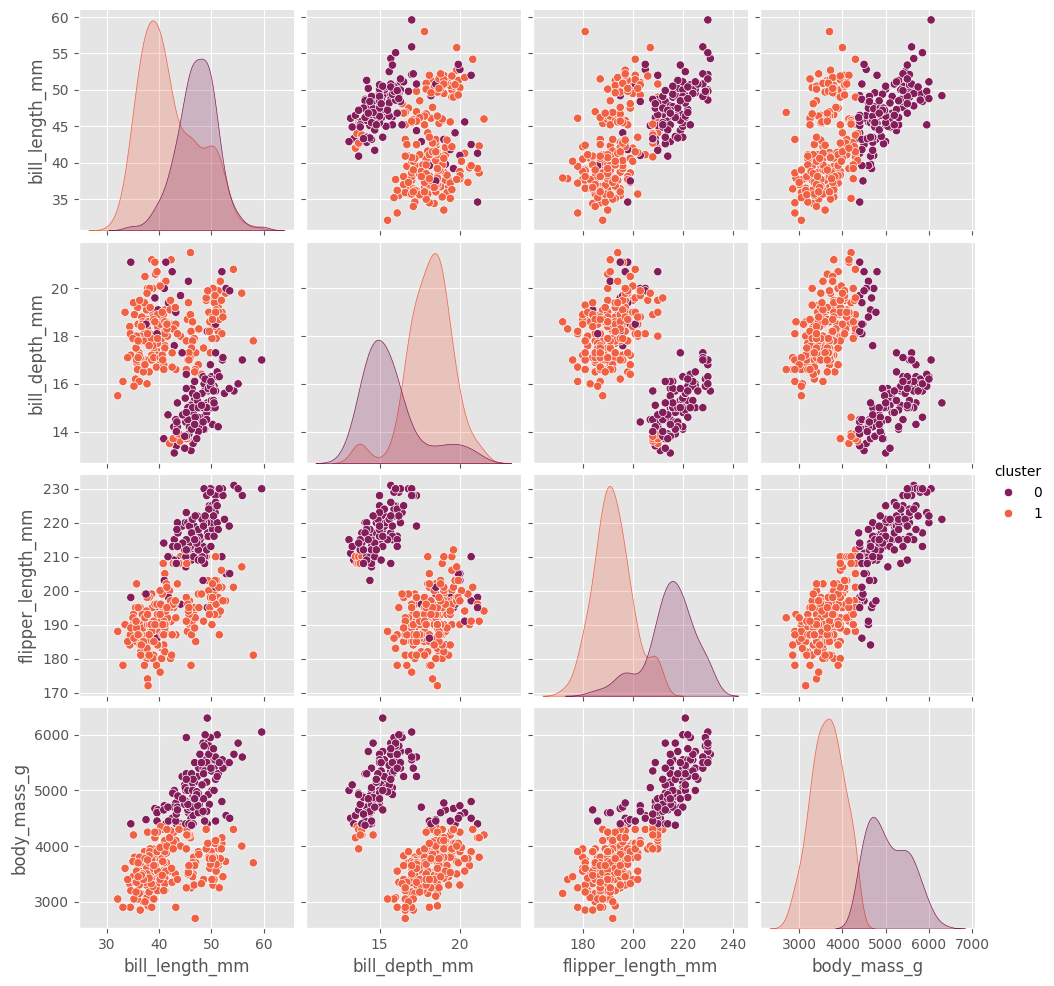

In [8]:
#добавляем метки кластеров к исходному набору данных
penguins['cluster'] = kmeans.labels_

#используем pairplot для визуализации кластеров
sns.pairplot(penguins, hue='cluster', palette='rocket')
plt.show()

3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

In [9]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Вычислить однородность, полноту и оценку V-меры
homogeneity = homogeneity_score(penguins['species'], kmeans.labels_)
completeness = completeness_score(penguins['species'], kmeans.labels_)
v_measure = v_measure_score(penguins['species'], kmeans.labels_)

print('Однородность:', homogeneity)
print('Полнота:', completeness)
print('Оценка V-меры:', v_measure)

Однородность: 0.3689109802627819
Полнота: 0.5810838007864318
Оценка V-меры: 0.4513039415357387


Величина V-меры (V-measure) комбинирует как однородность, так и полноту в единую метрику. Значение 0.45 показывает сбалансированность между однородностью и полнотой.

В совокупности эти показатели указывают на то, что результаты кластеризация не идеальна и требует дальнейшего улучшения для более точного разделения объектов по кластерам.

Для этого будем выбирать числовые атрибуты попарно:

1) Возьмем числовые атрибуты, которые явно связаны между собой:
'bill_length_mm', 'bill_depth_mm'

Оптимальное количество кластеров для KMeans: 2


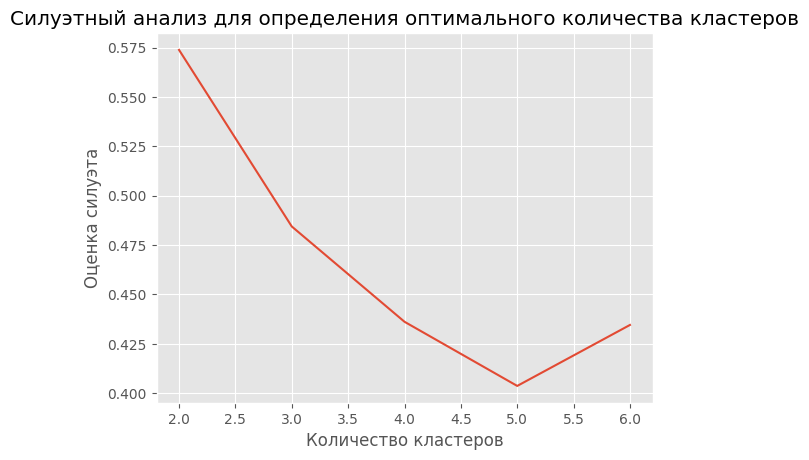

In [10]:
#силуэтный анализ
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
pengs2 = ['bill_length_mm', 'bill_depth_mm']
X2 = penguins[pengs2]

for n_clusters in range_n_clusters:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels2 = clusterer2.fit_predict(X2)
    silhouette_avg.append(silhouette_score(X2, cluster_labels2))

#определение оптимального числа кластеров
optimal_clusters = silhouette_avg.index(max(silhouette_avg)) + 2  # необходимо прибавить 2, так как индексация начинается с 0

print(f'Оптимальное количество кластеров для KMeans: {optimal_clusters}')

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Силуэтный анализ для определения оптимального количества кластеров')
plt.show()

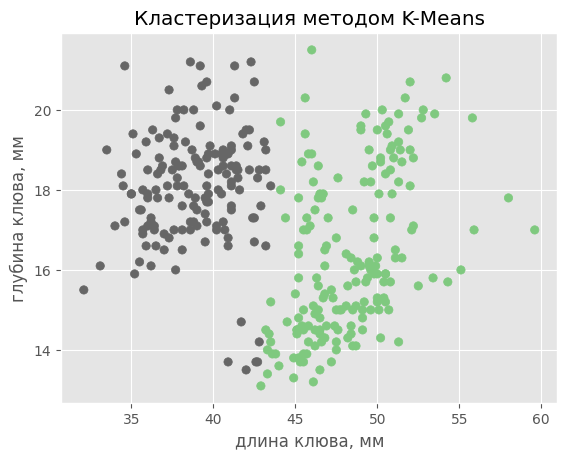

In [11]:
#создаем модель K-Means с 2 кластерами
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X2)

# Добавляем метки кластеров к датасету
penguins['cluster2'] = kmeans2.labels_

# Визуализируем кластеры
plt.scatter(X2['bill_length_mm'], X2['bill_depth_mm'], c=kmeans2.labels_, cmap='Accent')
plt.xlabel('длина клюва, мм')
plt.ylabel('глубина клюва, мм')
plt.title('Кластеризация методом K-Means')
plt.show()

In [12]:
# Вычислить однородность, полноту и оценку V-меры
homogeneity = homogeneity_score(penguins['species'], kmeans2.labels_)
completeness = completeness_score(penguins['species'], kmeans2.labels_)
v_measure = v_measure_score(penguins['species'], kmeans2.labels_)

print('Однородность:', homogeneity)
print('Полнота:', completeness)
print('Оценка V-меры:', v_measure)

Однородность: 0.4670603291388261
Полнота: 0.7133573539845545
Оценка V-меры: 0.5645136044794461


Оценка V-меры (V-measure) составляет 0.56, что указывает на баланс между однородностью и полнотой. Результаты кластеризации могут быть улучшены, но уже достигнут некоторый баланс.

Эти характеристики вновь показывают, что кластеризация не идеальна, но имеет некоторое качество и может быть улучшена для получения более точных результатов.

2) Возьмем следующие два числовых атрибута: 'flipper_length_mm', 'body_mass_g'

Оптимальное количество кластеров для KMeans: 2


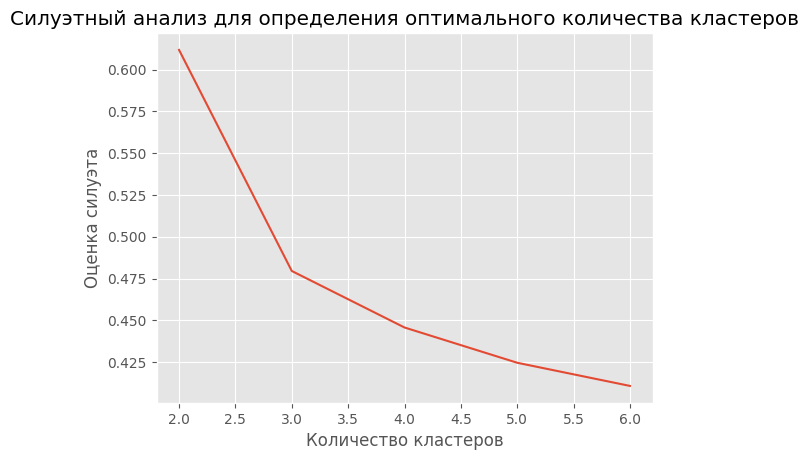

In [13]:
#силуэтный анализ
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
pengs3 = ['bill_length_mm', 'flipper_length_mm']
X3 = penguins[pengs3]

for n_clusters in range_n_clusters:
    clusterer3 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels3 = clusterer3.fit_predict(X3)
    silhouette_avg.append(silhouette_score(X3, cluster_labels3))

#определение оптимального числа кластеров
optimal_clusters = silhouette_avg.index(max(silhouette_avg)) + 2  #необходимо прибавить 2, так как индексация начинается с 0

print(f'Оптимальное количество кластеров для KMeans: {optimal_clusters}')

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Силуэтный анализ для определения оптимального количества кластеров')
plt.show()

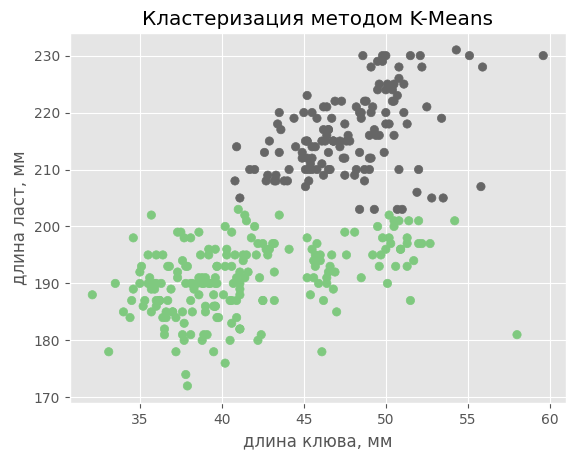

In [14]:
#создаем модель K-Means с 2 кластерами
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(X3)

#добавляем метки кластеров к датасету
penguins['cluster3'] = kmeans3.labels_

# Визуализируем кластеры
plt.scatter(X3['bill_length_mm'], X3['flipper_length_mm'], c=kmeans3.labels_, cmap='Accent')
plt.xlabel('длина клюва, мм')
plt.ylabel('длина плавника, мм')
plt.title('Кластеризация методом K-Means')
plt.show()

In [15]:
#вычислим однородность, полноту и оценку V-меры
homogeneity = homogeneity_score(penguins['species'], kmeans3.labels_)
completeness = completeness_score(penguins['species'], kmeans3.labels_)
v_measure = v_measure_score(penguins['species'], kmeans3.labels_)

print('Однородность:', homogeneity)
print('Полнота:', completeness)
print('Оценка V-меры:', v_measure)

Однородность: 0.5110599085353231
Полнота: 0.8003865835074452
Оценка V-меры: 0.6238081334497558


Значение V-меры выше, чем однородность, но ниже, чем полнота, что говорит о том, что кластеризация достигает разумного компромисса между этими двумя мерами.

В целом, эти значения характеристик кластеризации показывают, что кластеризация имеет умеренную однородность, хорошую полноту и сбалансированную производительность в целом.

3) попробуем связать три числовых параметра

Оптимальное количество кластеров для KMeans: 2


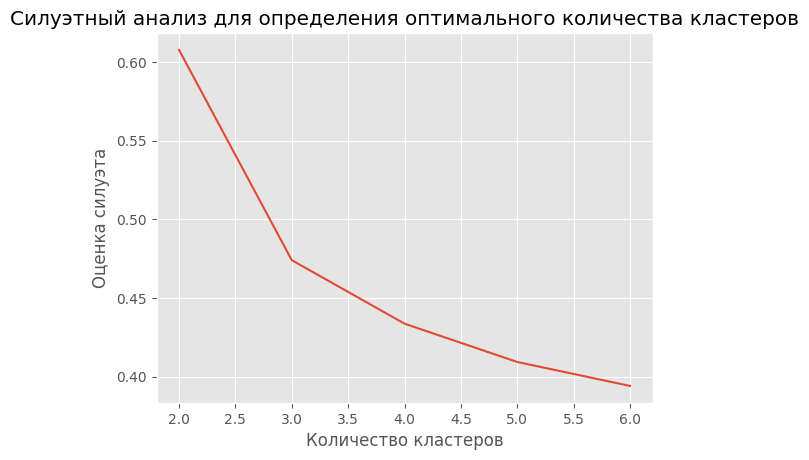

In [16]:
#силуэтный анализ
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
pengs4 = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X4 = penguins[pengs4]

for n_clusters in range_n_clusters:
    clusterer4 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels4 = clusterer4.fit_predict(X4)
    silhouette_avg.append(silhouette_score(X4, cluster_labels4))

#определение оптимального числа кластеров
optimal_clusters = silhouette_avg.index(max(silhouette_avg)) + 2  #необходимо прибавить 2, так как индексация начинается с 0

print(f'Оптимальное количество кластеров для KMeans: {optimal_clusters}')

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Силуэтный анализ для определения оптимального количества кластеров')
plt.show()

In [17]:
#отбираем нужные числовые атрибуты
pengs4 = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X4 = penguins[pengs4]

#применяем метод KMeans с количеством кластеров равным 2
kmeans4 = KMeans(n_clusters=2)
kmeans4.fit(X4)

#добавляем метки кластеров к исходному набору данных
penguins['cluster'] = kmeans4.labels_

In [18]:
#вычислим однородность, полноту и оценку V-меры
homogeneity = homogeneity_score(penguins['species'], kmeans4.labels_)
completeness = completeness_score(penguins['species'], kmeans4.labels_)
v_measure = v_measure_score(penguins['species'], kmeans4.labels_)

print('Однородность:', homogeneity)
print('Полнота:', completeness)
print('Оценка V-меры:', v_measure)

Однородность: 0.5110599085353231
Полнота: 0.8003865835074452
Оценка V-меры: 0.6238081334497558


Характеристики получились аналогично двум последним рассматриваемым числовым параметрам.

Итог: числовые атрибуты, которые не включают в себя массу тела пингвина показывают лучшие значения характеристик.

# **дополнение к лабораторной работе**

Чтобы сократить время, затрачиваемое на перебор числовых атрибутов, которые лучше между собой сочетаются, ниже предложен график, в котором можно менять желаемое количество числовых атрибутов, и отдельно менять количество кластеров.

В результате выводится сочетание числовых атрибутов для n-ого кол-ва кластеров с лучшими характеристиками однородности, полноты и V-меры.

In [19]:
import itertools

best_v_measure = 0
best_homogeneity = 0
best_completeness = 0
best_features = []

#перебираем все комбинации числовых признаков

#в строке ниже, вторым параметром можно менять количество числовых атрибутов,
# чтобы понимать для какого количества получаются лучшие характеристики


for subset in itertools.combinations(X.columns, 2):
    features_subset = penguins[list(subset)]
#в этой строке можно менять кол-во рассматриваемых кластеров
    kmeansx = KMeans(n_clusters=2, random_state=42)
    kmeansx.fit(features_subset)

    predicted_labels = kmeansx.labels_

    homogeneity = homogeneity_score(penguins['species'], predicted_labels)
    completeness = completeness_score(penguins['species'], predicted_labels)
    v_measure = v_measure_score(penguins['species'], predicted_labels)

    if v_measure > best_v_measure:
        best_v_measure = v_measure
        best_homogeneity = homogeneity
        best_completeness = completeness
        best_features = subset

print("Лучшие атрибуты:", best_features)
print("Лучшая однородность:", best_homogeneity)
print("Лучшая полнота:", best_completeness)
print("Лучшее V-значение:", best_v_measure)

Лучшие атрибуты: ('bill_length_mm', 'flipper_length_mm')
Лучшая однородность: 0.5110599085353231
Лучшая полнота: 0.8003865835074452
Лучшее V-значение: 0.6238081334497558
